ARCH(1) MODEL PROPERTIES DEMONSTRATION
Model: X_t = σ_t * ε_t, σ_t² = 0.1 + 0.3 * X²_(t-1)
where ε_t ~ iid N(0,1)

Theoretical Results:
Unconditional Variance: ω/(1-α₁) = 0.142857
Theoretical Kurtosis: 3(1-α₁²)/(1-3α₁²) = 3.739726

PART 1: DEMONSTRATING η_t = σ_t²(ε_t² - 1) IS WHITE NOISE

η_t series - White Noise Tests:
----------------------------------------
Sample Mean: -0.005585
Sample Variance: 0.044237
Ljung-Box test (lags 1-20):
  Number of significant lags (p < 0.05): 3/20
  Min p-value: 0.005715
ACF analysis (lags 1-50):
  Significant autocorrelations: 4/50
  Max |ACF|: 0.039073


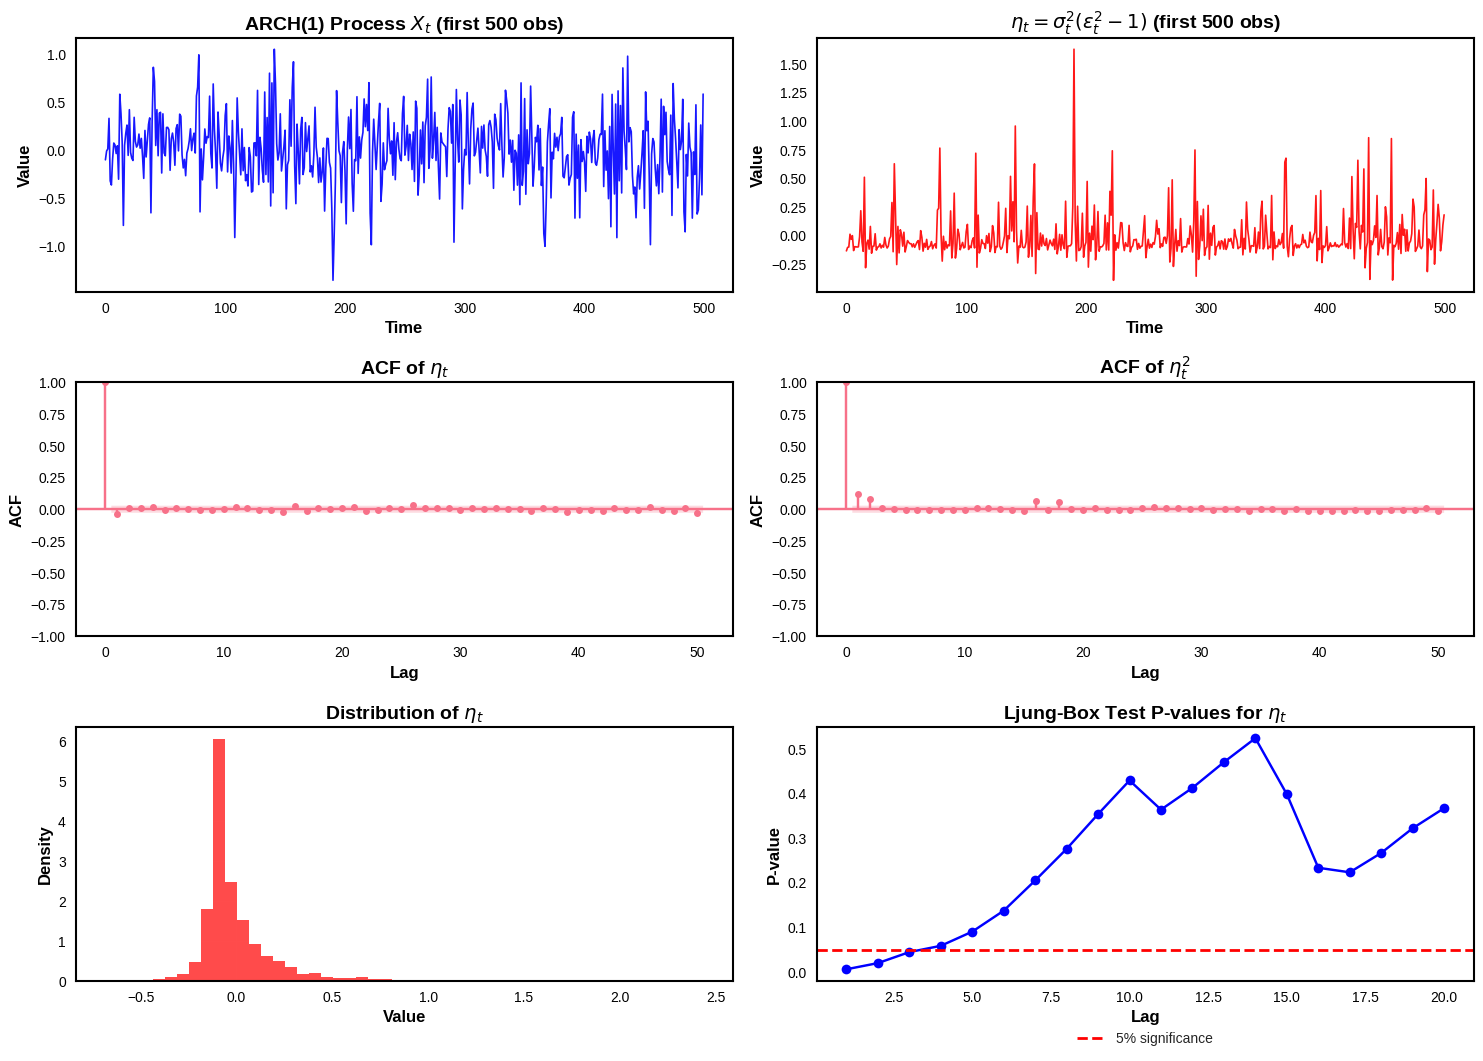


Monte Carlo Analysis (500 replications):
--------------------------------------------------
  Completed 200/500 replications
  Completed 400/500 replications

Monte Carlo Results:
Mean of η_t means: -0.000063 (should be ≈ 0)
Std of η_t means: 0.003108
Mean of η_t variances: 0.050758
Proportion with >2 significant LB lags: 0.492

PART 2: DEMONSTRATING KURTOSIS OF X_t > 3
Running 500 Monte Carlo replications...
  Completed 200/500 replications
  Completed 400/500 replications

Kurtosis Results:
Theoretical kurtosis: 3.739726
Mean sample kurtosis (Pearson): 3.689936
Mean E(X⁴)/[E(X²)]²: 3.690084
Normal distribution kurtosis: 3.0
Proportion > 3: 1.000


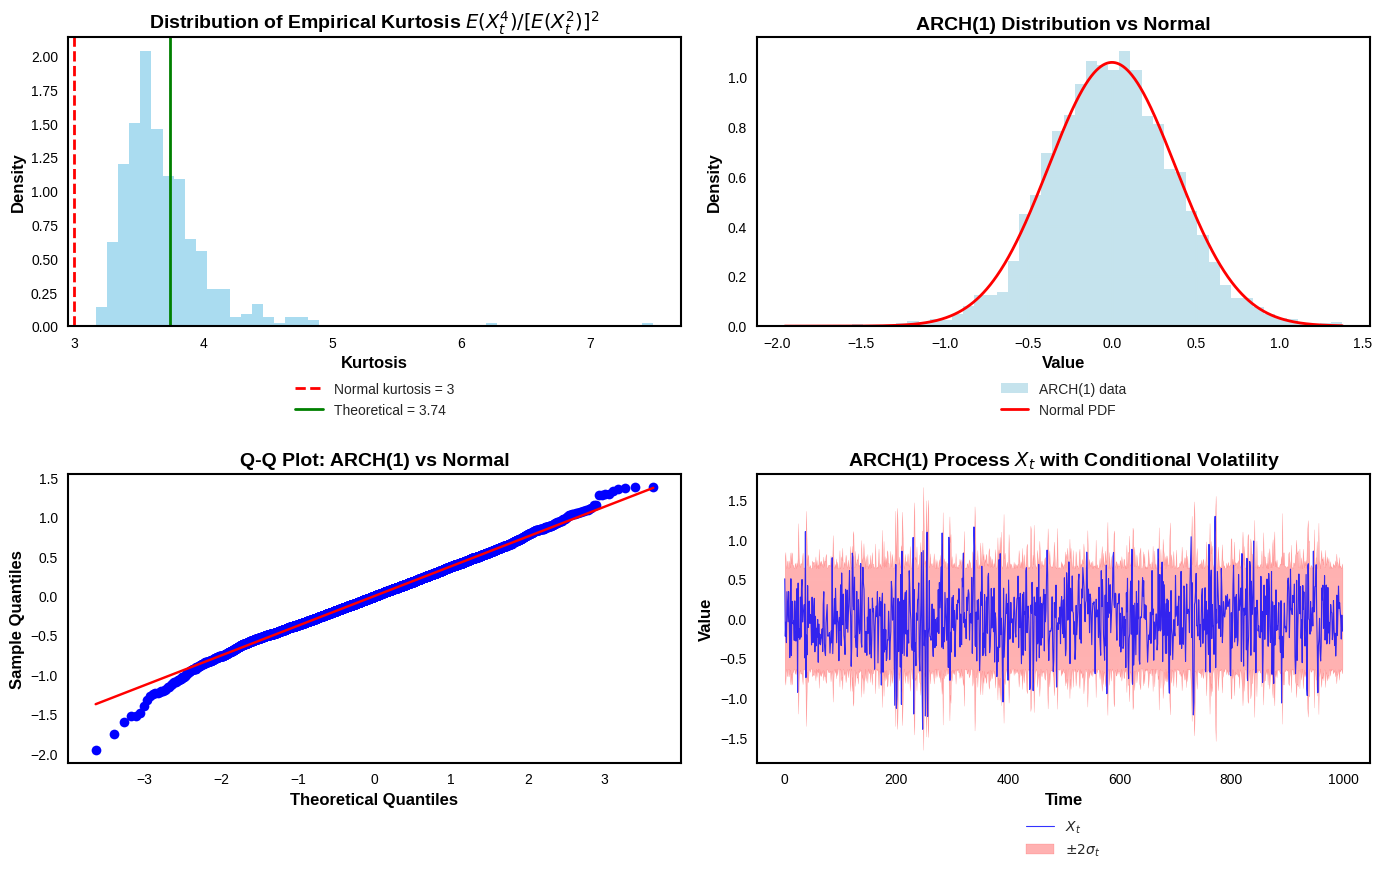


THEORETICAL SUMMARY

Part 1: η_t = σ_t²(ε_t² - 1) is White Noise
---------------------------------------------
• E(η_t) = E[σ_t²(ε_t² - 1)] = E(σ_t²)E(ε_t² - 1) = 0
• Var(η_t) is constant (shown through independence)
• Cov(η_{t+h}, η_t) = 0 for h > 0 (shown using conditional expectation)
• Therefore η_t is white noise

Part 2: Kurtosis of X_t > 3
------------------------------
• Theoretical kurtosis = 3(1-α₁²)/(1-3α₁²)
• With α₁ = 0.3: kurtosis = 3.7397
• Since 3.7397 > 3, ARCH(1) has heavier tails than normal
• This excess kurtosis captures volatility clustering

Conditions for well-defined moments:
• Second moment: α₁ < 1 ✓ (0.3 < 1)
• Fourth moment: 3α₁² < 1 ✓ (3×0.3² = 0.2700 < 1)

DEMONSTRATION COMPLETE
This simulation provides empirical evidence supporting the theoretical
proofs in Problem 62. The results show that:
1. η_t behaves as white noise (zero mean, constant variance, no correlation)
2. The kurtosis of X_t exceeds 3, indicating heavy tails
3. These properties hold consis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Enable LaTeX rendering for mathematical formulas
plt.rcParams['text.usetex'] = False  # Use matplotlib's mathtext instead of LaTeX
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

class ARCH1ProofDemo:
    """
    Demonstration of ARCH(1) model properties through simulation

    Problem 62: Prove that if ε_t ~ iidN(0,1) and 0 < α₁ < 1:
    (1) η_t = σ_t²(ε_t² - 1) is white noise
    (2) Kurtosis of X_t is greater than 3
    """

    def __init__(self, omega=0.1, alpha1=0.3, n_sim=10000, n_replications=1000):
        """
        Initialize ARCH(1) demonstration

        Parameters:
        omega (float): Constant term in volatility equation
        alpha1 (float): ARCH coefficient (0 < alpha1 < 1)
        n_sim (int): Number of time series observations
        n_replications (int): Number of Monte Carlo replications
        """
        self.omega = omega
        self.alpha1 = alpha1
        self.n_sim = n_sim
        self.n_replications = n_replications

        # Theoretical calculations
        self.theoretical_variance = omega / (1 - alpha1)
        self.theoretical_kurtosis = 3 * (1 - alpha1**2) / (1 - 3*alpha1**2)

        print("="*70)
        print("ARCH(1) MODEL PROPERTIES DEMONSTRATION")
        print("="*70)
        print(f"Model: X_t = σ_t * ε_t, σ_t² = {omega} + {alpha1} * X²_(t-1)")
        print(f"where ε_t ~ iid N(0,1)")
        print(f"\nTheoretical Results:")
        print(f"Unconditional Variance: ω/(1-α₁) = {self.theoretical_variance:.6f}")

        if 3*alpha1**2 < 1:
            print(f"Theoretical Kurtosis: 3(1-α₁²)/(1-3α₁²) = {self.theoretical_kurtosis:.6f}")
        else:
            print(f"Kurtosis undefined (3α₁² ≥ 1)")

    def simulate_arch1_single(self):
        """Simulate a single ARCH(1) time series"""
        # Initialize
        X = np.zeros(self.n_sim)
        sigma_sq = np.zeros(self.n_sim)
        epsilon = np.random.standard_normal(self.n_sim)

        # Initial condition
        sigma_sq[0] = self.omega / (1 - self.alpha1)  # Unconditional variance
        X[0] = np.sqrt(sigma_sq[0]) * epsilon[0]

        # Simulate ARCH(1) process
        for t in range(1, self.n_sim):
            sigma_sq[t] = self.omega + self.alpha1 * X[t-1]**2
            X[t] = np.sqrt(sigma_sq[t]) * epsilon[t]

        return X, sigma_sq, epsilon

    def compute_eta_series(self, sigma_sq, epsilon):
        """Compute η_t = σ_t²(ε_t² - 1)"""
        return sigma_sq * (epsilon**2 - 1)

    def test_white_noise_properties(self, series, title="Series", max_lags=50):
        """Test white noise properties of a time series"""
        print(f"\n{title} - White Noise Tests:")
        print("-" * 40)

        # Basic statistics
        mean = np.mean(series)
        var = np.var(series, ddof=1)

        print(f"Sample Mean: {mean:.6f}")
        print(f"Sample Variance: {var:.6f}")

        # Ljung-Box test for serial correlation
        lb_result = acorr_ljungbox(series, lags=20, return_df=True)
        significant_lags = (lb_result['lb_pvalue'] < 0.05).sum()

        print(f"Ljung-Box test (lags 1-20):")
        print(f"  Number of significant lags (p < 0.05): {significant_lags}/20")
        print(f"  Min p-value: {lb_result['lb_pvalue'].min():.6f}")

        # ACF analysis
        acf_values = acf(series, nlags=max_lags, fft=False)[1:]  # Exclude lag 0
        significant_acf = (np.abs(acf_values) > 1.96/np.sqrt(len(series))).sum()

        print(f"ACF analysis (lags 1-{max_lags}):")
        print(f"  Significant autocorrelations: {significant_acf}/{max_lags}")
        print(f"  Max |ACF|: {np.max(np.abs(acf_values)):.6f}")

        return {
            'mean': mean,
            'variance': var,
            'lb_significant': significant_lags,
            'acf_significant': significant_acf,
            'lb_result': lb_result,
            'acf_values': acf_values
        }

    def demonstrate_part1_single_simulation(self):
        """Demonstrate Part 1: η_t is white noise - Single simulation"""
        print("\n" + "="*70)
        print("PART 1: DEMONSTRATING η_t = σ_t²(ε_t² - 1) IS WHITE NOISE")
        print("="*70)

        # Simulate ARCH(1) process
        X, sigma_sq, epsilon = self.simulate_arch1_single()

        # Compute η_t
        eta = self.compute_eta_series(sigma_sq, epsilon)

        # Test white noise properties
        eta_stats = self.test_white_noise_properties(eta, "η_t series")

        # Create visualization
        fig, axes = plt.subplots(3, 2, figsize=(15, 12), facecolor='none')
        fig.patch.set_alpha(0.0)

        # Time series plots
        axes[0,0].plot(X[:500], linewidth=1.2, alpha=0.9, color='blue')
        axes[0,0].set_title(r'ARCH(1) Process $X_t$ (first 500 obs)', color='black', fontweight='bold')
        axes[0,0].set_facecolor('none')
        for spine in axes[0,0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[0,0].tick_params(colors='black', which='both', labelsize=10)
        axes[0,0].set_xlabel('Time', color='black', fontweight='bold')
        axes[0,0].set_ylabel('Value', color='black', fontweight='bold')

        axes[0,1].plot(eta[:500], linewidth=1.2, alpha=0.9, color='red')
        axes[0,1].set_title(r'$\eta_t = \sigma_t^2(\varepsilon_t^2 - 1)$ (first 500 obs)', color='black', fontweight='bold')
        axes[0,1].set_facecolor('none')
        for spine in axes[0,1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[0,1].tick_params(colors='black', which='both', labelsize=10)
        axes[0,1].set_xlabel('Time', color='black', fontweight='bold')
        axes[0,1].set_ylabel('Value', color='black', fontweight='bold')

        # ACF plots
        plot_acf(eta, lags=50, ax=axes[1,0], title='ACF of η_t')
        axes[1,0].grid(False)
        axes[1,0].set_facecolor('none')
        axes[1,0].set_title(r'ACF of $\eta_t$', color='black', fontweight='bold')
        for spine in axes[1,0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[1,0].tick_params(colors='black', which='both', labelsize=10)
        axes[1,0].set_xlabel('Lag', color='black', fontweight='bold')
        axes[1,0].set_ylabel('ACF', color='black', fontweight='bold')

        plot_acf(eta**2, lags=50, ax=axes[1,1], title='ACF of η_t²')
        axes[1,1].grid(False)
        axes[1,1].set_facecolor('none')
        axes[1,1].set_title(r'ACF of $\eta_t^2$', color='black', fontweight='bold')
        for spine in axes[1,1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[1,1].tick_params(colors='black', which='both', labelsize=10)
        axes[1,1].set_xlabel('Lag', color='black', fontweight='bold')
        axes[1,1].set_ylabel('ACF', color='black', fontweight='bold')

        # Distribution plots
        axes[2,0].hist(eta, bins=50, density=True, alpha=0.7, color='red')
        axes[2,0].set_title(r'Distribution of $\eta_t$', color='black', fontweight='bold')
        axes[2,0].set_facecolor('none')
        for spine in axes[2,0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[2,0].tick_params(colors='black', which='both', labelsize=10)
        axes[2,0].set_xlabel('Value', color='black', fontweight='bold')
        axes[2,0].set_ylabel('Density', color='black', fontweight='bold')

        # Ljung-Box p-values
        axes[2,1].plot(range(1, 21), eta_stats['lb_result']['lb_pvalue'], 'o-', color='blue')
        axes[2,1].axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='5% significance')
        axes[2,1].set_title(r'Ljung-Box Test P-values for $\eta_t$', color='black', fontweight='bold')
        axes[2,1].set_xlabel('Lag', color='black', fontweight='bold')
        axes[2,1].set_ylabel('P-value', color='black', fontweight='bold')
        axes[2,1].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
        axes[2,1].set_facecolor('none')
        for spine in axes[2,1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[2,1].tick_params(colors='black', which='both', labelsize=10)

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.savefig('arch1_eta_white_noise_demoProb62.png', dpi=300, bbox_inches='tight', transparent=True)
        plt.show()

        return eta_stats

    def demonstrate_part1_monte_carlo(self):
        """Demonstrate Part 1: Monte Carlo evidence"""
        print(f"\nMonte Carlo Analysis ({self.n_replications} replications):")
        print("-" * 50)

        # Storage for results
        eta_means = []
        eta_vars = []
        lb_rejections = []

        # Monte Carlo simulation
        for i in range(self.n_replications):
            if (i+1) % 200 == 0:
                print(f"  Completed {i+1}/{self.n_replications} replications")

            X, sigma_sq, epsilon = self.simulate_arch1_single()
            eta = self.compute_eta_series(sigma_sq, epsilon)

            # Collect statistics
            eta_means.append(np.mean(eta))
            eta_vars.append(np.var(eta, ddof=1))

            # Ljung-Box test
            lb_result = acorr_ljungbox(eta, lags=10, return_df=True)
            rejections = (lb_result['lb_pvalue'] < 0.05).sum()
            lb_rejections.append(rejections)

        # Summarize results
        print(f"\nMonte Carlo Results:")
        print(f"Mean of η_t means: {np.mean(eta_means):.6f} (should be ≈ 0)")
        print(f"Std of η_t means: {np.std(eta_means):.6f}")
        print(f"Mean of η_t variances: {np.mean(eta_vars):.6f}")
        print(f"Proportion with >2 significant LB lags: {np.mean(np.array(lb_rejections) > 2):.3f}")

        return {
            'means': eta_means,
            'variances': eta_vars,
            'lb_rejections': lb_rejections
        }

    def demonstrate_part2_kurtosis(self):
        """Demonstrate Part 2: Kurtosis > 3"""
        print("\n" + "="*70)
        print("PART 2: DEMONSTRATING KURTOSIS OF X_t > 3")
        print("="*70)

        # Monte Carlo simulation for kurtosis
        kurtosis_values = []
        sample_kurtoses = []

        print(f"Running {self.n_replications} Monte Carlo replications...")

        for i in range(self.n_replications):
            if (i+1) % 200 == 0:
                print(f"  Completed {i+1}/{self.n_replications} replications")

            X, _, _ = self.simulate_arch1_single()

            # Compute sample kurtosis
            sample_kurt = stats.kurtosis(X, fisher=False)  # Pearson kurtosis
            sample_kurtoses.append(sample_kurt)

            # Compute kurtosis as E(X^4)/[E(X^2)]^2
            moment4 = np.mean(X**4)
            moment2_sq = np.mean(X**2)**2
            kurt_ratio = moment4 / moment2_sq
            kurtosis_values.append(kurt_ratio)

        # Results
        mean_sample_kurt = np.mean(sample_kurtoses)
        mean_kurt_ratio = np.mean(kurtosis_values)

        print(f"\nKurtosis Results:")
        print(f"Theoretical kurtosis: {self.theoretical_kurtosis:.6f}")
        print(f"Mean sample kurtosis (Pearson): {mean_sample_kurt:.6f}")
        print(f"Mean E(X⁴)/[E(X²)]²: {mean_kurt_ratio:.6f}")
        print(f"Normal distribution kurtosis: 3.0")
        print(f"Proportion > 3: {np.mean(np.array(kurtosis_values) > 3):.3f}")

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor='none')
        fig.patch.set_alpha(0.0)

        # Histogram of kurtosis values
        axes[0,0].hist(kurtosis_values, bins=50, density=True, alpha=0.7, color='skyblue')
        axes[0,0].axvline(x=3, color='red', linestyle='--', linewidth=2, label='Normal kurtosis = 3')
        axes[0,0].axvline(x=self.theoretical_kurtosis, color='green', linestyle='-', linewidth=2, label=f'Theoretical = {self.theoretical_kurtosis:.2f}')
        axes[0,0].set_title(r'Distribution of Empirical Kurtosis $E(X_t^4)/[E(X_t^2)]^2$', color='black', fontweight='bold')
        axes[0,0].set_xlabel('Kurtosis', color='black', fontweight='bold')
        axes[0,0].set_ylabel('Density', color='black', fontweight='bold')
        axes[0,0].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
        axes[0,0].set_facecolor('none')
        for spine in axes[0,0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[0,0].tick_params(colors='black', which='both', labelsize=10)

        # Sample path with normal overlay
        X_sample, _, _ = self.simulate_arch1_single()
        axes[0,1].hist(X_sample, bins=50, density=True, alpha=0.7, color='lightblue', label='ARCH(1) data')
        x_range = np.linspace(X_sample.min(), X_sample.max(), 1000)
        normal_pdf = stats.norm.pdf(x_range, 0, np.sqrt(self.theoretical_variance))
        axes[0,1].plot(x_range, normal_pdf, 'r-', linewidth=2, label='Normal PDF')
        axes[0,1].set_title('ARCH(1) Distribution vs Normal', color='black', fontweight='bold')
        axes[0,1].set_xlabel('Value', color='black', fontweight='bold')
        axes[0,1].set_ylabel('Density', color='black', fontweight='bold')
        axes[0,1].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
        axes[0,1].set_facecolor('none')
        for spine in axes[0,1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[0,1].tick_params(colors='black', which='both', labelsize=10)

        # Q-Q plot
        stats.probplot(X_sample, dist="norm", plot=axes[1,0])
        axes[1,0].set_title('Q-Q Plot: ARCH(1) vs Normal', color='black', fontweight='bold')
        axes[1,0].grid(False)
        axes[1,0].set_facecolor('none')
        axes[1,0].set_xlabel('Theoretical Quantiles', color='black', fontweight='bold')
        axes[1,0].set_ylabel('Sample Quantiles', color='black', fontweight='bold')
        for spine in axes[1,0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[1,0].tick_params(colors='black', which='both', labelsize=10)

        # Time series with volatility
        sigma_sq_sample = np.zeros(len(X_sample))
        sigma_sq_sample[0] = self.theoretical_variance
        for t in range(1, len(X_sample)):
            sigma_sq_sample[t] = self.omega + self.alpha1 * X_sample[t-1]**2

        axes[1,1].plot(X_sample[:1000], linewidth=0.8, alpha=0.8, color='blue', label=r'$X_t$')
        axes[1,1].fill_between(range(1000), 2*np.sqrt(sigma_sq_sample[:1000]), -2*np.sqrt(sigma_sq_sample[:1000]), alpha=0.3, color='red', label=r'$\pm 2\sigma_t$')
        axes[1,1].set_title(r'ARCH(1) Process $X_t$ with Conditional Volatility', color='black', fontweight='bold')
        axes[1,1].set_xlabel('Time', color='black', fontweight='bold')
        axes[1,1].set_ylabel('Value', color='black', fontweight='bold')
        axes[1,1].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
        axes[1,1].set_facecolor('none')
        for spine in axes[1,1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        axes[1,1].tick_params(colors='black', which='both', labelsize=10)

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.savefig('arch1_kurtosis_demoProb62.png', dpi=300, bbox_inches='tight', transparent=True)
        plt.show()

        return {
            'kurtosis_values': kurtosis_values,
            'sample_kurtoses': sample_kurtoses,
            'mean_kurtosis': mean_kurt_ratio
        }

    def theoretical_summary(self):
        """Print theoretical summary with proper mathematical notation"""
        print("\n" + "="*70)
        print("THEORETICAL SUMMARY")
        print("="*70)

        print(f"\nPart 1: η_t = σ_t²(ε_t² - 1) is White Noise")
        print("-" * 45)
        print("• E(η_t) = E[σ_t²(ε_t² - 1)] = E(σ_t²)E(ε_t² - 1) = 0")
        print("• Var(η_t) is constant (shown through independence)")
        print("• Cov(η_{t+h}, η_t) = 0 for h > 0 (shown using conditional expectation)")
        print("• Therefore η_t is white noise")

        print(f"\nPart 2: Kurtosis of X_t > 3")
        print("-" * 30)
        print(f"• Theoretical kurtosis = 3(1-α₁²)/(1-3α₁²)")
        print(f"• With α₁ = {self.alpha1}: kurtosis = {self.theoretical_kurtosis:.4f}")
        print(f"• Since {self.theoretical_kurtosis:.4f} > 3, ARCH(1) has heavier tails than normal")
        print("• This excess kurtosis captures volatility clustering")

        print(f"\nConditions for well-defined moments:")
        print(f"• Second moment: α₁ < 1 ✓ ({self.alpha1} < 1)")
        print(f"• Fourth moment: 3α₁² < 1 ✓ (3×{self.alpha1}² = {3*self.alpha1**2:.4f} < 1)")

    def run_complete_demonstration(self):
        """Run complete demonstration of both parts"""
        # Part 1: White noise property
        eta_stats = self.demonstrate_part1_single_simulation()
        mc_results = self.demonstrate_part1_monte_carlo()

        # Part 2: Kurtosis property
        kurtosis_results = self.demonstrate_part2_kurtosis()

        # Theoretical summary
        self.theoretical_summary()

        return {
            'eta_stats': eta_stats,
            'mc_results': mc_results,
            'kurtosis_results': kurtosis_results
        }

# Run the demonstration
if __name__ == "__main__":
    # Create demonstration instance
    demo = ARCH1ProofDemo(omega=0.1, alpha1=0.3, n_sim=5000, n_replications=500)

    # Run complete demonstration
    results = demo.run_complete_demonstration()

    print("\n" + "="*70)
    print("DEMONSTRATION COMPLETE")
    print("="*70)
    print("This simulation provides empirical evidence supporting the theoretical")
    print("proofs in Problem 62. The results show that:")
    print("1. η_t behaves as white noise (zero mean, constant variance, no correlation)")
    print("2. The kurtosis of X_t exceeds 3, indicating heavy tails")
    print("3. These properties hold consistently across Monte Carlo replications")